## Final Project Submission

Please fill out:
* Student name: Winnie Nzuve
* Student pace: Hybrid
* Scheduled project review date/time: 04/12/2023
* Instructor name: Mark Tiba
* Blog post URL:


In [532]:
import pandas as pd
import numpy as np
import csv
import shutil
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import sqlite3
conn = sqlite3.connect('im.db')


## BUSINESS PLAN

**Objective**:
To establish Microsoft Studios as a successful player in the film industry by leveraging data insights to produce commercially successful movies.


Relevance to CEO's Goals:

**Box Office Performance**: Understanding the box office success of different genres helps in identifying lucrative segments.
Audience Preferences: Analyzing audience ratings helps in understanding the type of movies that resonate with viewers.
**Critical Reviews**: Examining critical reviews aids in gauging the quality and reception of various movie genres.
2. Insights for Decision Making:
Actionable Insights for CEO:

**Genre Preferences**: Identify the most successful genres at the box office.
Audience Engagement: Determine genres that receive high audience ratings and positive critical reviews.
Financial Viability: Evaluate the relationship between budget, box office gross, and profitability for various genres.
**Franchise Potential**: Explore the success of movie franchises and shared universes.
**Strategic Decisions and Goals**:
Strategic Decisions Based on Data:

**Genre Selection**: Focus on producing movies in genres that show high box office performance, audience engagement, and critical acclaim.
**Investment Strategy**: Allocate resources towards genres with high potential for financial returns and audience appeal.
Franchise Development: Consider creating a series of movies within a connected universe to build anticipation and audience loyalty.
**Talent Acquisition**: Collaborate with established filmmakers, directors, and writers associated with successful genres.


## DATA UNDERSTANDING

The data comes from various sources such as - Box Office Mojo, 
                                            - IMDB,
                                            - Rotten Tomatoes, etc. 
It includes information about movie titles, genres, box office performance (domestic and worldwide gross), audience ratings, and critical reviews.


**Data-driven** insights will guide the selection of genres with proven box office success and audience appeal, reducing the risk of investing in unpopular genres.
Investment Strategy:

**Detailed analysis** of budget versus box office performance will aid in making informed decisions about resource allocation and budgeting for different genres.
Franchise Development:

**Identifying successful franchises** and shared universes will enable Microsoft Studios to strategically plan interconnected movies, fostering audience anticipation and loyalty.
Talent Acquisition:

**Collaboration with filmmakers** and talent associated with successful genres will enhance the quality and potential success of Microsoft Studios' productions.
**Conclusion**
By utilizing data-driven insights to inform decisions about genre selection, investment strategy, franchise development, and talent acquisition, Microsoft Studios can position itself strategically in the movie industry. This approach minimizes risks and maximizes the potential for producing commercially successful movies, aligning with the CEO's goal of establishing Microsoft Studios as a competitive force in the film industry.

## LOADING DATASETS

In [533]:
# Loading the datasets
bom_movies = pd.read_csv('bom.movie_gross.csv')
rt_movies = pd.read_csv('rt.movie_info.tsv', sep='\t')
rt_reviews = pd.read_csv('rt.reviews.tsv', sep='\t', encoding= 'latin1')
tmdb_movies = pd.read_csv('tmdb.movies.csv')
movie_budgets = pd.read_csv('tn.movie_budgets.csv')

## DATA PREPARATION

In [534]:
#checking information from the bom movies dataframe
bom_movies = pd.read_csv('bom.movie_gross.csv')
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [535]:
bom_movies.shape

(3387, 5)

In [536]:
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [537]:
bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [538]:
#checking information on rotten tomatoes
rt_movies = pd.read_csv('rt.movie_info.tsv', sep='\t')
rt_movies

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [539]:
rt_movies.shape

(1560, 12)

In [540]:
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [541]:
rt_movies.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [542]:
#checking on the rotten tomatoes reviews
rt_reviews = pd.read_csv('rt.reviews.tsv', sep='\t', encoding= 'latin1')
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [543]:
rt_reviews.shape

(54432, 8)

In [544]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [545]:
rt_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [546]:
#checking on tmdb movies dataframe
tmdb_movies = pd.read_csv('tmdb.movies.csv')
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [547]:
tmdb_movies.shape

(26517, 10)

In [548]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [549]:
tmdb_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [550]:
#checking on movie budgets dataframe
movie_budgets = pd.read_csv('tn.movie_budgets.csv')
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [551]:
movie_budgets.shape

(5782, 6)

In [552]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [553]:
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [554]:
conn = sqlite3.connect('im.db')
data = pd.read_sql_query('SELECT name from sqlite_master where type= "table";', conn) 
data

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers
8,bom_movies
9,tmdb_movies


In [555]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


## CLEANING MISSING VALUES 

### From the information above, we have missing values in the rt_movies, bom_movies and rt_reviews dataframes.

In [556]:
bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [557]:
# Identify the columns with missing values
columns_w_na = ['studio', 'domestic_gross', 'foreign_gross']

# Calculate the percentage of missing values
percentage_missing = bom_movies[columns_w_na].isnull().mean() * 100

for column in percentage_missing.index:
    print("Percentage of missing values in column '{}': {:.2f}%".format(column,percentage_missing[column])) 

Percentage of missing values in column 'studio': 0.15%
Percentage of missing values in column 'domestic_gross': 0.83%
Percentage of missing values in column 'foreign_gross': 39.86%


In [558]:
#replace missing values domestic gross with mean and drop missing values in studio.
mean_domestic_gross = bom_movies['domestic_gross'].mean()
bom_movies['domestic_gross'].fillna(mean_domestic_gross, inplace=True)

bom_movies.dropna(subset=['studio'], inplace=True)



In [559]:
bom_movies['foreign_gross'].head()

0    652000000
1    691300000
2    664300000
3    535700000
4    513900000
Name: foreign_gross, dtype: object

In [560]:
# Replace NaN values with 0 in the 'foreign_gross' column for easier cleaning
bom_movies['foreign_gross'].fillna(0, inplace=True)


# Convert 'foreign_gross' column to numeric (float) data type
bom_movies['foreign_gross'] = pd.to_numeric(bom_movies['foreign_gross'], errors='coerce')

print(bom_movies.info())


<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3377 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB
None


In [561]:
#checking for duplicates
duplicates = bom_movies[bom_movies.duplicated()]
len(duplicates)

0

In [562]:
rt_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [563]:
rt_reviews= rt_reviews.dropna()

In [564]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33988 entries, 0 to 54424
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          33988 non-null  int64 
 1   review      33988 non-null  object
 2   rating      33988 non-null  object
 3   fresh       33988 non-null  object
 4   critic      33988 non-null  object
 5   top_critic  33988 non-null  int64 
 6   publisher   33988 non-null  object
 7   date        33988 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.3+ MB


In [565]:
#checking for duplicates
duplicates = rt_reviews[rt_reviews.duplicated()]
len(duplicates)

0

In [566]:
rt_movies.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [567]:
rt_movies.dropna(subset=['synopsis', 'director', 'writer', 'theater_date', 'dvd_date', 'runtime', 'studio',  'currency', 'rating', 'genre', 'box_office'], inplace=True)


In [568]:
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


In [569]:
rt_movies.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [570]:
duplicates =rt_movies[rt_movies.duplicated()]
len(duplicates)

0

In [571]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [572]:
duplicates =tmdb_movies[tmdb_movies.duplicated()]
len(duplicates)

0

In [573]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [574]:
duplicates = movie_budgets[movie_budgets.duplicated()]
len(duplicates)

0

## DATA ANALYSIS

### Exploratory Data Analysis (EDA)

* Analysis of Box Office Earnings
* Explore the distribution of box office earnings.
* Investigate top-performing movies based on earnings.
* Analyze the popularity of different genres.
* Determine which genres tend to have higher box office earnings.
* Identify trends regarding release dates (seasonality, month/day of the week).
* Explore the impact of movie ratings on box office success.

In [575]:
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018
3384,El Pacto,Sony,2500.0,0.0,2018
3385,The Swan,Synergetic,2400.0,0.0,2018


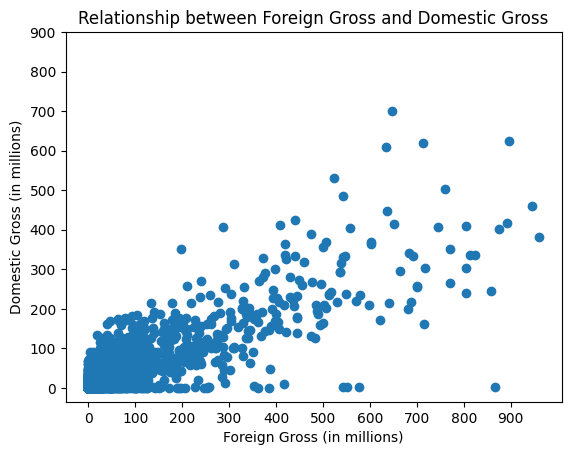

In [576]:
# Create a scatter plot
plt.scatter(bom_movies['foreign_gross'], bom_movies['domestic_gross'], color='tab:blue')
plt.xlabel('Foreign Gross (in millions)')
plt.ylabel('Domestic Gross (in millions)')
plt.title('Relationship between Foreign Gross and Domestic Gross')

# Set the tick values
x_ticks = range(0, int(max(bom_movies['foreign_gross'])/1000000) + 1, 100)
y_ticks = range(0, int(max(bom_movies['domestic_gross'])/1000000) + 1, 100)

# Convert tick values to millions
x_ticks_millions = [x * 1000000 for x in x_ticks]
y_ticks_millions = [y * 1000000 for y in y_ticks]

# Set the modified tick values
plt.xticks(x_ticks_millions, x_ticks)
plt.yticks(y_ticks_millions, y_ticks)

plt.show()

In [635]:
# Create a new column "total_gross"
bom_movies['total_gross'] = bom_movies['domestic_gross'].fillna(0) + bom_movies['foreign_gross'].fillna(0)
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [636]:
# Count the number of unique studios
unique_studios = bom_movies['studio'].nunique()

print("Number of unique studios:", unique_studios)

Number of unique studios: 257


In [637]:
# Find the index of the row with the highest total gross
highest_total_gross_index = bom_movies['total_gross'].idxmax()

movie_highest_total_gross = bom_movies.loc[highest_total_gross_index, 'title']

print("Movie with the highest total gross:", movie_highest_total_gross)


Movie with the highest total gross: Marvel's The Avengers


In [638]:
top_ten_movies = bom_movies.nlargest(10, 'total_gross')

# Display the list of top ten movies
print("Top ten movies by total gross:")
print(top_ten_movies[['title', 'total_gross']])


Top ten movies by total gross:
                                            title   total_gross
727                         Marvel's The Avengers  1.518900e+09
1875                      Avengers: Age of Ultron  1.405400e+09
3080                                Black Panther  1.347000e+09
328   Harry Potter and the Deathly Hallows Part 2  1.341500e+09
2758                     Star Wars: The Last Jedi  1.332600e+09
3081               Jurassic World: Fallen Kingdom  1.309500e+09
1127                                       Frozen  1.276400e+09
2759                  Beauty and the Beast (2017)  1.263500e+09
3082                                Incredibles 2  1.242800e+09
1128                                   Iron Man 3  1.214800e+09


In [639]:
tmdb_movies
# Extract and anlyse ratings from tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Minimum Rating: 0.0
Maximum Rating: 10.0
The mean value of the ratings column is 5.991, median value is 6.0.    
The standard deviation is 1.853.


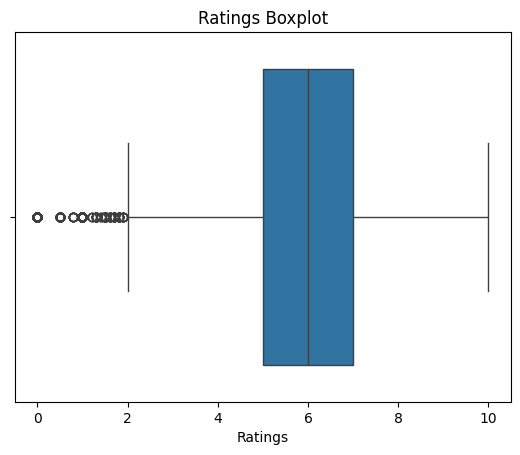

In [640]:
ratings_tmdb = tmdb_movies['vote_average']

# Calculate the minimum and maximum values
min_rating = ratings_tmdb.min()
max_rating = ratings_tmdb.max()

# Print the range of values
print("Minimum Rating:", min_rating)
print("Maximum Rating:", max_rating)


print(f'The mean value of the ratings column is {ratings_tmdb.mean():.3f}, median value is {ratings_tmdb.median()}.\
    \nThe standard deviation is {ratings_tmdb.std():.3f}.')

column_data = tmdb_movies['vote_average']

# Create the boxplot using Seaborn
sns.boxplot(x=column_data, color='tab:blue')

plt.title('Ratings Boxplot')
plt.xlabel('Ratings')

plt.show();

In [641]:
# Calculate the correlation between 'vote_average' and 'popularity'
correlation = tmdb_movies['vote_average'].corr(tmdb_movies['popularity'])

print(f"Correlation between vote average and popularity: {correlation}")

# Get the first 10 movies with the highest popularity
top_10_popularity = tmdb_movies.nlargest(10, 'popularity')

# Displaying the top 10 movies with highest popularity
print("\nTop 10 movies with highest popularity:")
print(top_10_popularity[['original_title', 'popularity']])


Correlation between vote average and popularity: 0.06527330770988116

Top 10 movies with highest popularity:
                                    original_title  popularity
23811                       Avengers: Infinity War      80.773
11019                                    John Wick      78.123
23812            Spider-Man: Into the Spider-Verse      60.534
11020    The Hobbit: The Battle of the Five Armies      53.783
5179                                  The Avengers      50.289
11021                      Guardians of the Galaxy      49.606
20617                            Blade Runner 2049      48.571
23813                            Blade Runner 2049      48.571
23814  Fantastic Beasts: The Crimes of Grindelwald      48.508
23815                    Ralph Breaks the Internet      48.057


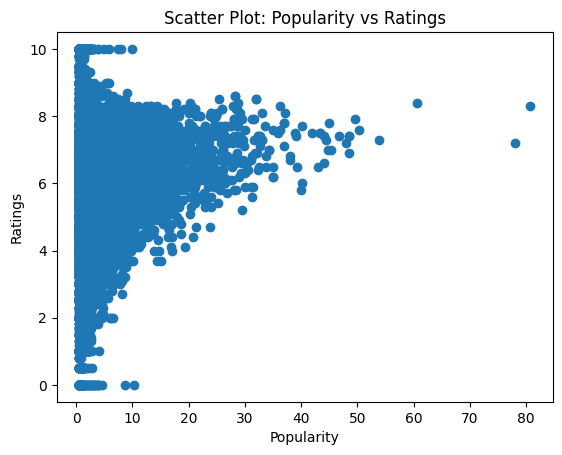

In [642]:
popularity_data = tmdb_movies['popularity']
ratings_data = tmdb_movies['vote_average']

# Create the scatter plot
plt.scatter(popularity_data, ratings_data, color='tab:blue')

plt.title('Scatter Plot: Popularity vs Ratings')
plt.xlabel('Popularity')
plt.ylabel('Ratings')


plt.show()

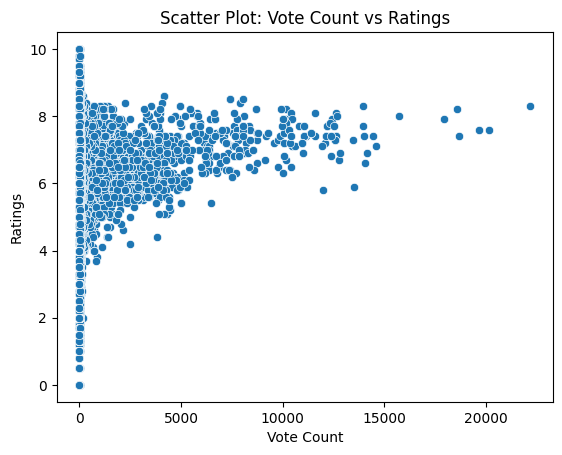

In [643]:
# compare vote_count and rating

vote_count_data = tmdb_movies['vote_count']
ratings_data = tmdb_movies['vote_average']

# Create the scatter plot using Seaborn
sns.scatterplot(x=vote_count_data, y=ratings_data, color='tab:blue')

# Set the title and labels
plt.title('Scatter Plot: Vote Count vs Ratings')
plt.xlabel('Vote Count')
plt.ylabel('Ratings')

# Display the plot
plt.show()

In [644]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit_loss,worldwide_profit_loss,Release Year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0,9.997217e+08,2017


In [645]:
# Convert 'release_date' column to datetime format
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit_loss,worldwide_profit_loss,Release Year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0,9.997217e+08,2017


In [588]:
movie_budgets['production_budget'].head()

0    $425,000,000
1    $410,600,000
2    $350,000,000
3    $330,600,000
4    $317,000,000
Name: production_budget, dtype: object

In [589]:
# Remove non-numeric characters and convert to numeric data type
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(r'[^0-9]', '', regex=True).astype(float)

movie_budgets['production_budget'].head()

0    425000000.0
1    410600000.0
2    350000000.0
3    330600000.0
4    317000000.0
Name: production_budget, dtype: float64

In [590]:
# Convert currency columns to numeric values (remove '$' and commas, and convert to float)
currency_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in currency_columns:
    movie_budgets[col] = movie_budgets[col].replace('[\$,]', '', regex=True).astype(float)

# Calculate profit/loss differences between production budgets and domestic gross
movie_budgets['domestic_profit_loss'] = movie_budgets['domestic_gross'] - movie_budgets['production_budget']

# Calculate profit/loss differences between production budgets and worldwide gross
movie_budgets['worldwide_profit_loss'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

# Find movies with the highest return profit (domestic)
highest_domestic_profit = movie_budgets.loc[movie_budgets['domestic_profit_loss'].idxmax()]

# Find movies with the highest return profit (worldwide)
highest_worldwide_profit = movie_budgets.loc[movie_budgets['worldwide_profit_loss'].idxmax()]

# Display movies with the highest return profit (domestic and worldwide)
print("Movie with the highest return profit (Domestic):")
print(highest_domestic_profit[['movie', 'domestic_profit_loss']])

print("\nMovie with the highest return profit (Worldwide):")
print(highest_worldwide_profit[['movie', 'worldwide_profit_loss']])


Movie with the highest return profit (Domestic):
movie                   Star Wars Ep. VII: The Force Awakens
domestic_profit_loss                             630662225.0
Name: 5, dtype: object

Movie with the highest return profit (Worldwide):
movie                          Avatar
worldwide_profit_loss    2351345279.0
Name: 0, dtype: object


In [591]:
# Sort by domestic profit/loss and get the top 10 movies
top_ten_domestic_profit = movie_budgets.nlargest(10, 'domestic_profit_loss')[['movie', 'domestic_profit_loss']]

# Sort by worldwide profit/loss and get the top 10 movies
top_ten_worldwide_profit = movie_budgets.nlargest(10, 'worldwide_profit_loss')[['movie', 'worldwide_profit_loss']]

# Display top ten movies with the highest return profit (domestic)
print("Top ten movies with the highest return profit (Domestic):")
print(top_ten_domestic_profit)

print("\nTop ten movies with the highest return profit (Worldwide):")
print(top_ten_worldwide_profit)


Top ten movies with the highest return profit (Domestic):
                                     movie  domestic_profit_loss
5     Star Wars Ep. VII: The Force Awakens           630662225.0
41                           Black Panther           500059566.0
42                                 Titanic           459363944.0
3464          Star Wars Ep. IV: A New Hope           449998007.0
33                          Jurassic World           437270625.0
3525             ET: The Extra-Terrestrial           424610554.0
43                           Incredibles 2           408581744.0
26                            The Avengers           398279547.0
6                   Avengers: Infinity War           378815482.0
692                                Shrek 2           371226247.0

Top ten movies with the highest return profit (Worldwide):
                                             movie  worldwide_profit_loss
0                                           Avatar           2.351345e+09
42                 

In [592]:
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


In [593]:
# Converting box_office column to numeric values (removing $ sign)
rt_movies['box_office'] = rt_movies['box_office'].replace('[\$,]', '', regex=True).astype(float)

# Grouping by genre and calculating mean box office revenue for each genre
genre_mean_box_office = rt_movies.groupby('genre')['box_office'].mean().sort_values(ascending=False)

top_5_genres = genre_mean_box_office.head(5)
print(top_5_genres)


genre
Kids and Family|Science Fiction and Fantasy                              2.618359e+08
Science Fiction and Fantasy                                              1.908711e+08
Action and Adventure|Drama|Mystery and Suspense                          1.467904e+08
Action and Adventure|Mystery and Suspense|Science Fiction and Fantasy    1.447380e+08
Action and Adventure|Science Fiction and Fantasy                         1.420119e+08
Name: box_office, dtype: float64


## DATA VISUALIZATION

In [594]:
conn = sqlite3.connect('im.db')
data = pd.read_sql_query('SELECT name from sqlite_master where type= "table";', conn) 
data

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers
8,bom_movies
9,tmdb_movies


In [595]:
movie_akas['region'].value_counts().head()

region
US     51490
XWW    18467
RU     13817
DE     11634
FR     10990
Name: count, dtype: int64

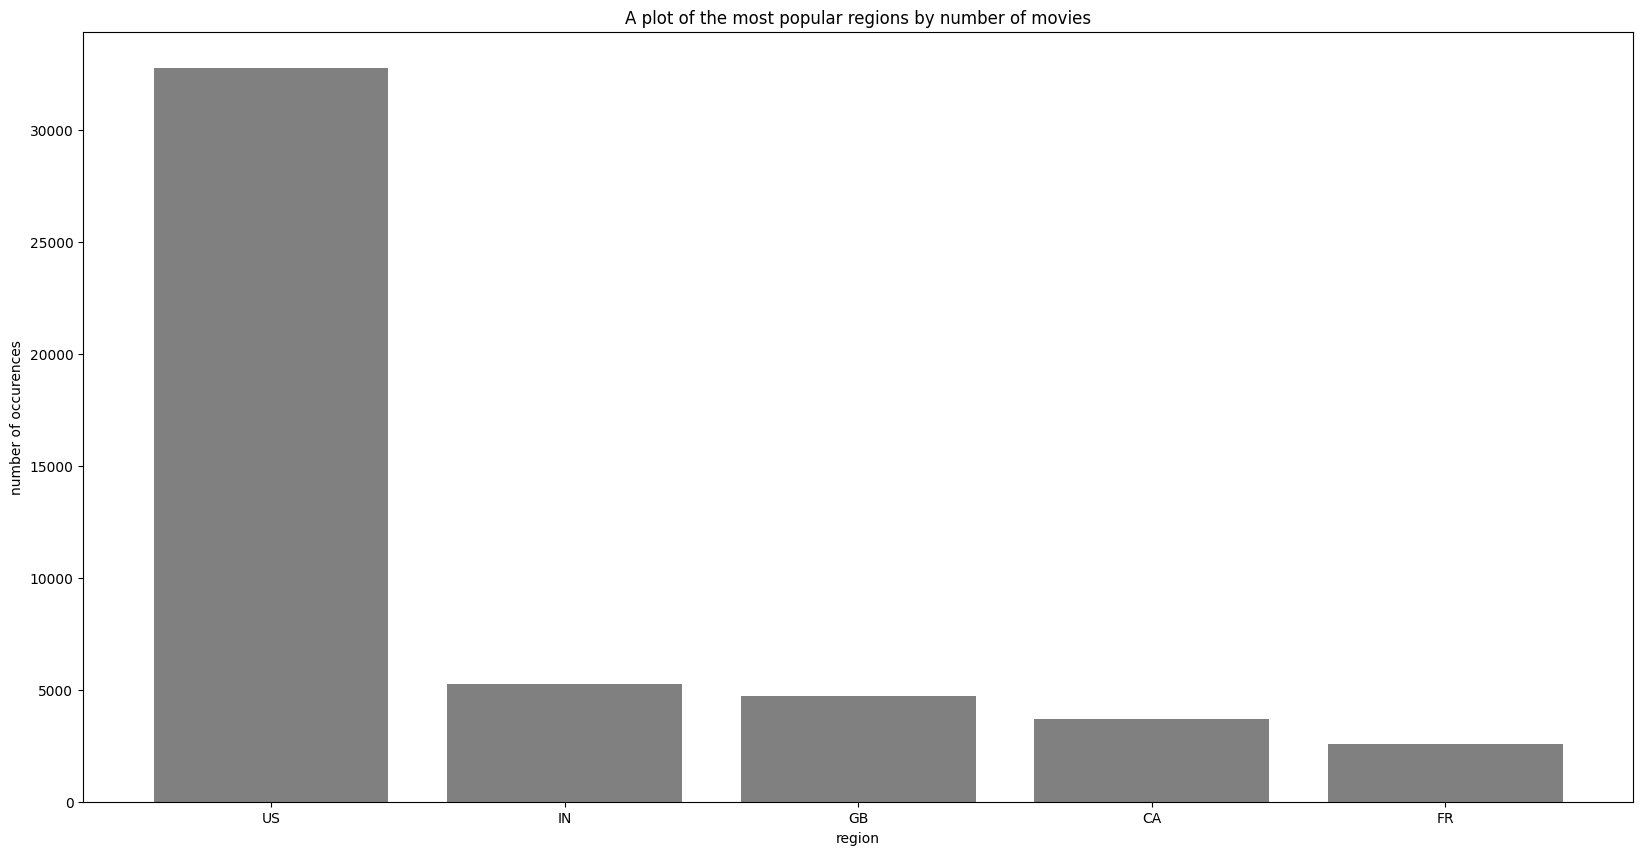

In [596]:
region = ['US', 'IN', 'GB', 'CA', 'FR']
entries = [32728, 5246, 4728, 3683, 2559]

popular_regions = plt.figure(figsize = (20, 10))

 
# creating the bar plot
plt.bar(region, entries, color ='grey')

plt.xlabel('region')
plt.ylabel('number of occurences')
plt.title('A plot of the most popular regions by number of movies')
plt.show()

In [597]:
df = pd.read_sql (""" SELECT *
                            FROM movie_basics
                            JOIN movie_ratings
                                USING (movie_id)
                    """, conn
)

In [598]:
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [599]:
# Creating a common column in the df dataset
df["title"] = df["original_title"]
df.drop("original_title", axis=1, inplace=True)
df

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,title
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Sunghursh
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,Ashad Ka Ek Din
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,Sabse Bada Sukh
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,La Telenovela Errante
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6,Diabolik sono io
73852,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,Sokagin Çocuklari
73853,tt9914642,Albatross,2017,NaN,Documentary,8.5,8,Albatross
73854,tt9914942,La vida sense la Sara Amat,2019,NaN,None,6.6,5,La vida sense la Sara Amat


In [600]:
merge = pd.merge(df, bom_movies, on = 'title')
merge

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,total_gross
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,0.0,2016,1100000.0
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013,188100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2439,tt8097306,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Nobody's Fool,Par.,31700000.0,1800000.0,2018,33500000.0
2440,tt8108198,Andhadhun,2018,139.0,"Crime,Thriller",8.5,43409,Andhadhun,Eros,1200000.0,0.0,2018,1200000.0
2441,tt8427036,Helicopter Eela,2018,135.0,Drama,5.4,673,Helicopter Eela,Eros,72000.0,0.0,2018,72000.0
2442,tt8549902,Oolong Courtyard: KungFu School,2018,103.0,Comedy,4.6,61,Oolong Courtyard,CL,37700.0,0.0,2018,37700.0


In [601]:
# creating a function that will check for missing values

def missing_values (data):

    miss = data.isnull().sum().sort_values(ascending = False)

    #knowing the %centage of missing values
    percentage_miss = (data.isnull().sum() / len(data)*100).sort_values(ascending = False)

    #store in a frame
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    #removing misseing values
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace=True)

    return missing

missing_values(df_merging)

,Missing Values,Percentage(%)
runtime_minutes,43,1.762295
foreign_gross,3,0.122951
total_gross,3,0.122951


In [602]:
# Dropping the missing values
merge = merge.dropna(subset=['genres'])
missing_values(merge)

,Missing Values,Percentage(%)
runtime_minutes,43,1.762295
foreign_gross,3,0.122951
total_gross,3,0.122951


In [603]:
merge.isna().sum()

movie_id            0
primary_title       0
start_year          0
runtime_minutes    43
genres              0
averagerating       0
numvotes            0
title               0
studio              0
domestic_gross      0
foreign_gross       3
year                0
total_gross         3
dtype: int64

In [604]:
ratings = merge[merge['averagerating'] >= 7]
ratings.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,total_gross
count,771.000000,753.000000,771.000000,7.710000e+02,7.710000e+02,7.690000e+02,771.000000,7.690000e+02
mean,2013.870298,110.706507,7.484047,1.316130e+05,5.248018e+07,7.568842e+07,2014.054475,1.265741e+08
std,2.515157,22.790505,0.419792,2.035399e+05,9.700527e+07,1.528482e+08,2.446761,2.387311e+08
min,2010.000000,40.000000,7.000000,5.000000e+00,6.000000e+02,0.000000e+00,2010.000000,6.000000e+02
25%,2012.000000,96.000000,7.200000,4.894000e+03,6.125000e+05,0.000000e+00,2012.000000,1.156800e+06
50%,2014.000000,108.000000,7.400000,4.123100e+04,6.500000e+06,6.600000e+06,2014.000000,1.760000e+07
75%,2016.000000,124.000000,7.700000,1.739185e+05,5.635000e+07,6.360000e+07,2016.000000,1.221000e+08
max,2019.000000,186.000000,9.200000,1.841066e+06,7.001000e+08,9.464000e+08,2018.000000,1.405400e+09


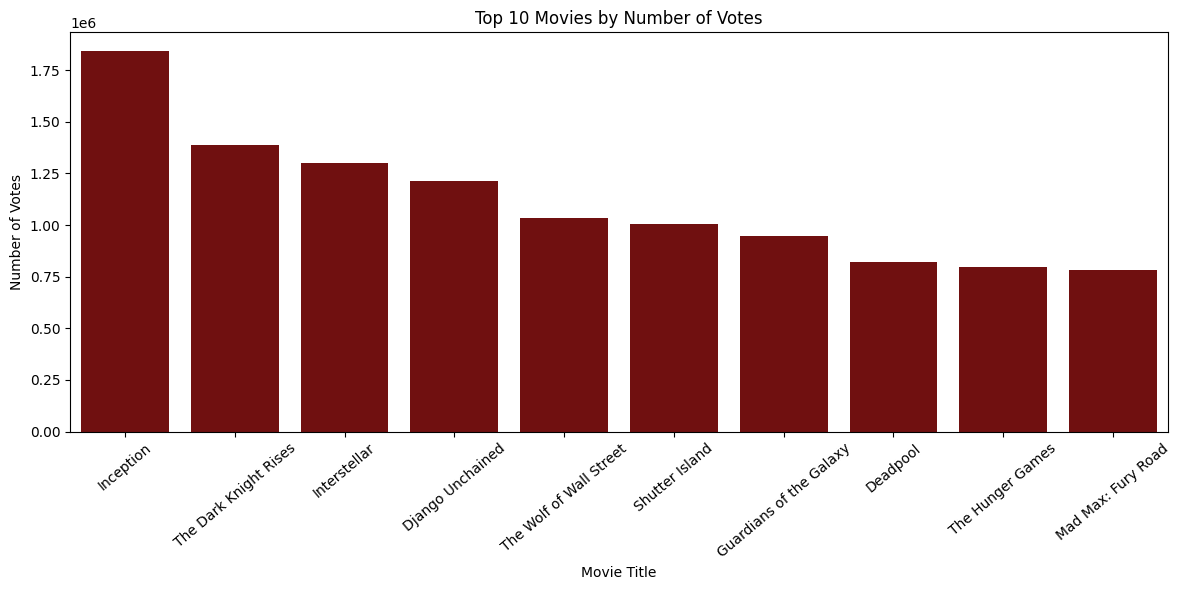

In [630]:
ratings_sorted = ratings.sort_values(by='numvotes', ascending=False)

# Select the top 10 movies
top_n = 10 
top_movies = ratings_sorted.head(top_n)

# Create a bar plot using the top 10 movies


plt.figure(figsize=(12, 6))
ax = sns.barplot(x="title", y="numvotes", data=top_movies, color ="maroon")
plt.title(f"Top 10 Movies by Number of Votes")
plt.xticks(rotation=40)
plt.xlabel("Movie Title")
plt.ylabel("Number of Votes")
plt.tight_layout()

# Show the plot
plt.show()

In [611]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit_loss,worldwide_profit_loss
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0,9.997217e+08
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,-7000.0,-7.000000e+03
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,42482.0,2.344950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3662.0,-3.662000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1400.0,-1.400000e+03


In [614]:
 #Identifying top-performing movies
top_grossing_movies = movie_budgets.sort_values('worldwide_gross', ascending=False).head(10)
top_grossing_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit_loss,worldwide_profit_loss,Release Year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09,2009
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,459363944.0,2.008208e+09,1997
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,630662225.0,1.747311e+09,2015
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,378815482.0,1.748134e+09,2018
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,437270625.0,1.433855e+09,2015
66,67,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09,163007020.0,1.328723e+09,2015
26,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,398279547.0,1.292936e+09,2012
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09,2015
41,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,500059566.0,1.148258e+09,2018
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,256193157.0,1.216693e+09,2011


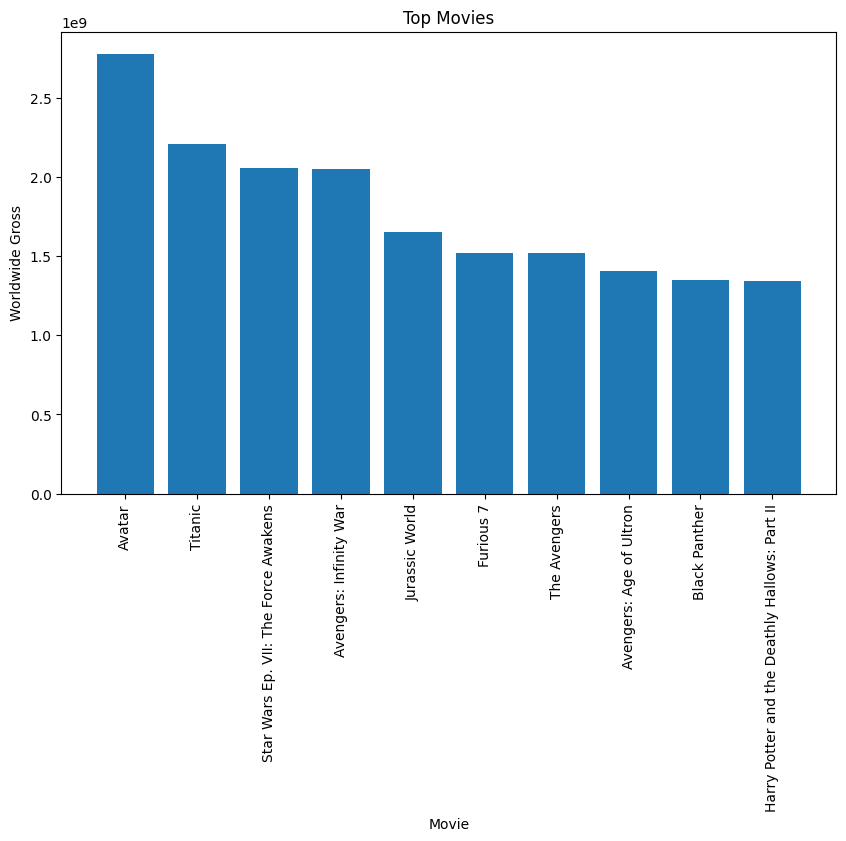

In [627]:
# Barchart showing the Top showing Movies
plt.figure(figsize=(10, 6))
plt.bar(top_grossing_movies['movie'], top_grossing_movies['worldwide_gross'])
plt.xlabel('Movie')
plt.ylabel('Worldwide Gross')
plt.title('Top Movies')
plt.xticks(rotation=90)
plt.show()

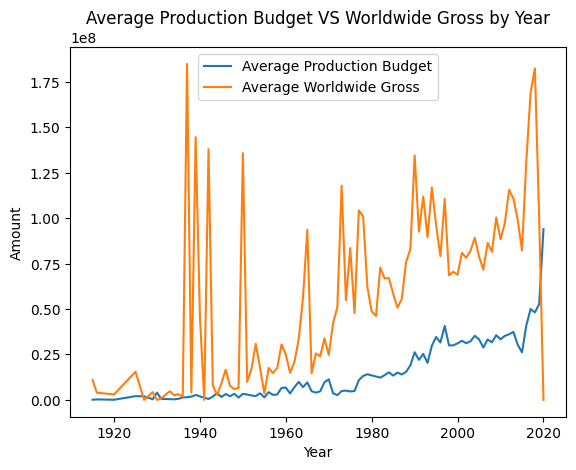

In [631]:
#Exploring trends over time
movie_budgets['Release Year'] = pd.to_datetime(movie_budgets['release_date']).dt.year

average_budget_by_year = movie_budgets.groupby('Release Year')['production_budget'].mean()
average_gross_by_year = movie_budgets.groupby('Release Year')['worldwide_gross'].mean()

plt.plot(average_budget_by_year.index, average_budget_by_year.values, label='Average Production Budget')
plt.plot(average_gross_by_year.index, average_gross_by_year.values, label='Average Worldwide Gross')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Average Production Budget VS Worldwide Gross by Year')
plt.legend()
plt.show()

## CONCLUSIONS 

**Successful Movies**: The movies with the highest profit returns, namely "Avatar," "Pirates of the Caribbean," "Dark Phoenix," and "Avengers: Age of Ultron," indicate that large-scale franchises, fantasy genres, and superhero films tend to perform exceptionally well at the box office. Inception was the most watched movie. 

**Popularity Trends**: Among the top-ranking movies based on popularity, "Avengers: Infinity War," "John Wick," and "Spider-Man: Into the Spider-Verse" indicate a substantial audience interest in action-packed, visually appealing, and engaging storytelling.

**Audience Preferences**: Analysis of the popular regions by the number of movies suggests that the United States has a significant market share in the film industry, signifying potential opportunities to cater to the American audience.

**Audience Engagement**: "Inception" emerges as the most popular movie in terms of votes, signifying that thought-provoking and intricately crafted narratives have the potential to engage and captivate viewers.

## RECOMMENDATION

Based on the findings, here are the recommended strategies for Microsoft's new movie studio:

**Franchise Potential**:Consider investing in the development of new studio opportunities that encompass fantasy, adventure, and superhero genres. Creating expansive cinematic universes akin to successful franchises like Marvel or Avatar could resonate well with audiences and yield substantial returns.

**Action-Oriented Content**: Focus on producing visually striking, action-oriented movies with immersive storytelling, akin to the successful releases such as "Avengers: Infinity War," "John Wick," and "Spider-Man: Into the Spider-Verse."

**Targeting the American Market**: While ensuring a global reach, prioritize content tailored to resonate with American audiences to capitalize on the substantial market share within the United States.

**Engaging and Original Concepts**: Dedicate efforts toward crafting original and thought-provoking narratives akin to "Inception" that challenge and engage the audience intellectually while providing an entertaining experience.

**Strategic Partnerships and Talent Acquisition**: Forge collaborations with established directors, writers, and actors within the film industry known for delivering successful and captivating content. Such partnerships can elevate the quality and marketability of the studio's productions.